In [11]:
import json
import numpy as np
from numpy import linalg as LA
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
import math

from sklearn import linear_model, model_selection
from sklearn import cluster
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer



In [12]:
def rrm_event(bin_size,data):
    #print("Inside rrm_event()")
    baseline_start=0
    response_end=.2
    event_window=np.arange(baseline_start,response_end, bin_size)
    total_bins=len(event_window)
    event_times=data['events']
    neurons=data['neurons']
    relative_spikes=[]
    all_events=[]

    rrm=[]


    for event in event_times:
        #print('new loop')
        event_vals=event_times[event]
        all_neurons=[]
        for neuron in neurons:
            neuron_val=neurons[neuron]
            relative_spikes=[]
            rrm=[]
            for val in event_vals:
                relative_spikes.append(list(np.array(neuron_val)-val))


            for relative_spike in relative_spikes:
                binned_spikes = np.histogram(relative_spike, total_bins, range = (baseline_start, response_end))[0]
                rrm.append(list(binned_spikes))

            all_neurons.append(rrm)

        all_events.append(all_neurons)


    return(all_events)


def kmean(all_events):
    rrm_1=all_events[0]
    rrm_2=all_events[1]
    rrm_3=all_events[2]
    rrm_4=all_events[3]

    #print ('rrm shape: ', np.shape(rrm_2))

    rrm1_t = np.mean(rrm_1, axis=0)  
    rrm2_t = np.mean(rrm_2, axis=0)  
    rrm3_t = np.mean(rrm_3, axis=0)  
    rrm4_t = np.mean(rrm_4, axis=0)  


    #print('rrm avg shape: ', np.shape(rrm_2_avg))

    #rrm1_t=np.transpose(rrm_1,(1,0, 2))
    #rrm2_t=np.transpose(rrm_2,(1,0, 2))
    #rrm3_t=np.transpose(rrm_3,(1,0, 2))
    #rrm4_t=np.transpose(rrm_4,(1,0, 2))

    e1_len = len(rrm1_t)
    e2_len = len(rrm2_t)
    e3_len = len(rrm3_t)
    e4_len = len(rrm4_t)

    ground = []


    for i in range(e1_len):
        ground.append(0)

    for i in range(e2_len):
        ground.append(1)
        
    for i in range(e3_len):
        ground.append(2)

    for i in range(e4_len):
        ground.append(3)
    #mnts_1 = np.reshape(rrm1_t, (-1, len(rrm_1)))

    #mnts_2 = np.reshape(rrm2_t, (-1, len(rrm_2)))
    #print('mnts 2',len(mnts_2))
    #mnts_3 = np.reshape(rrm3_t, (-1, len(rrm_3)))
    #mnts_4 = np.reshape(rrm4_t, (-1, len(rrm_4)))
    #print('mnts len',(len(mnts_1)+len(mnts_2)+len(mnts_3)+len(mnts_4)))
    mnts = np.concatenate((rrm1_t, rrm2_t,rrm3_t,rrm4_t), axis=0)

    #mnts = mnts.reshape(-1, mnts.shape[2])
    #mnts = mnts.reshape(mnts.shape[0], -1)

    return(mnts, ground, e1_len, e2_len, e3_len, e4_len)




In [13]:
def get_confusion_matrix(ground, predicted):
    result_confusion = confusion_matrix(ground, predicted)
    accuracy = (result_confusion[0][0] + result_confusion[1][1] + result_confusion[2][2] + result_confusion[3][3])/sum(sum(result_confusion))
    return result_confusion, accuracy


def get_accuracy(ground, predicted, e1_len, e2_len, e3_len, e4_len):
    event_1 = predicted[0:e1_len]
    event_2 = predicted[e1_len:e1_len+e2_len]
    #event_3 = predicted[]

    unique1, count1 = np.unique(event_1, return_counts=True)
    print(unique1, count1)



In [30]:
def get_rrm(bin_size, data):
    all_events=rrm_event(bin_size,data)
    all_rrm, ground, e1_len, e2_len, e3_len, e4_len = kmean(all_events)

    print("Shape after averaging across the neurons: ", np.shape(all_rrm))
    return all_rrm, ground, e1_len, e2_len, e3_len, e4_len

def get_info(all_rrm, ground, e1_len, e2_len, e3_len, e4_len, rand):
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(all_rrm, ground, test_size=0.2, random_state=rand)

    kmeans = cluster.KMeans(n_clusters = 4)
    kmeans.fit(x_train, y_train)
    labels = kmeans.labels_

    print(labels)
    print(y_train)

    print(np.shape(labels))
    print(np.shape(y_train))
    #print(y_test)

    # Instantiate the clustering model and visualizer
    km = KMeans(random_state=rand)
    visualizer = KElbowVisualizer(km, k=(2,12))
    
    visualizer.fit(all_rrm)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure
    
    
    kmean_rrm=KMeans(n_clusters=8, random_state=rand)
    
    #kmean_rrm=KMeans(n_clusters=4, random_state = rand)        
    kmean_rrm.fit(all_rrm)
    rrm_labels=kmean_rrm.labels_

    #print("Bin size = {} ms".format(int(bin_size*1000)))
    #get_confusion_matrix(ground, rrm_labels)
    #y_kmeans = kmean_rrm.predict(all_rrm)

    #print('rrm_labels',rrm_labels)
    #val=1+1
    #print(all_rrm)

    label, num = np.unique(rrm_labels, return_counts=True)
    print('\n')
    print('Labels: \n', label, '\n')
    print('Distribution: \n', num, '\n')
    
    plt.scatter(range(0,300), rrm_labels)
    #full_count


In [15]:
f = open('hw4.json')
data = json.load(f)
f.close()

rand = 50 #np.random.randint(0, 100)
accuracy = []
index = []
distribution = []
event_dist = []

In [16]:
bin_size = 0.001
all_rrm, ground, e1_len, e2_len, e3_len, e4_len = get_rrm(bin_size, data)



Shape after averaging across the neurons:  (300, 200)


In [17]:
print(ground)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 2 1 0 1 3 1 1 2 0 1 3 1 1 2 3 1 1 0 1 1 3 1 1 1 3 3 1 3 0 3 2 0 3 0 0
 0 0 0 1 1 1 1 2 1 0 2 0 0 1 3 1 1 1 1 1 1 1 0 1 1 0 2 0 0 1 1 1 1 2 1 1 1
 1 2 1 0 1 1 3 0 0 0 0 1 2 2 2 1 1 1 2 2 1 1 2 1 0 2 0 2 0 1 0 1 3 2 1 3 1
 1 1 1 0 1 0 0 0 0 1 1 1 0 3 1 1 1 0 1 1 0 1 2 3 2 0 1 3 1 0 2 1 1 3 1 0 0
 1 1 1 0 0 1 2 0 1 0 0 2 1 2 1 2 2 3 1 1 0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 3 0 1 1 1 2 0 1 1 0 1 1 0 1 1 1 0 2 3 1 3 3 3 1 1 0 0 1 1 3 1 1 3 1 3 1 1
 1 1 1 0 1 0 0 0 3 3 0 3 3 1 3 0 2 1]
[3, 1, 1, 2, 3, 0, 1, 2, 1, 2, 3, 0, 1, 0, 2, 3, 0, 2, 0, 1, 2, 0, 3, 0, 2, 0, 1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 0, 3, 2, 1, 1, 1, 1, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 3, 3, 3, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 3, 2, 3, 1, 3, 1, 3, 2, 1, 0, 2, 1, 2, 2, 1, 2, 3, 0, 3, 3, 3, 3, 2, 0, 1, 3, 3, 2, 0, 0, 3, 2, 0, 3, 0, 0, 1, 1, 3, 0, 3, 0, 1, 2, 2, 0, 1, 2, 3, 3, 0, 0, 0, 3, 3, 2, 0, 1, 2, 3, 3, 1, 0, 1, 0, 0, 3, 1, 2, 0, 3, 1, 2

c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

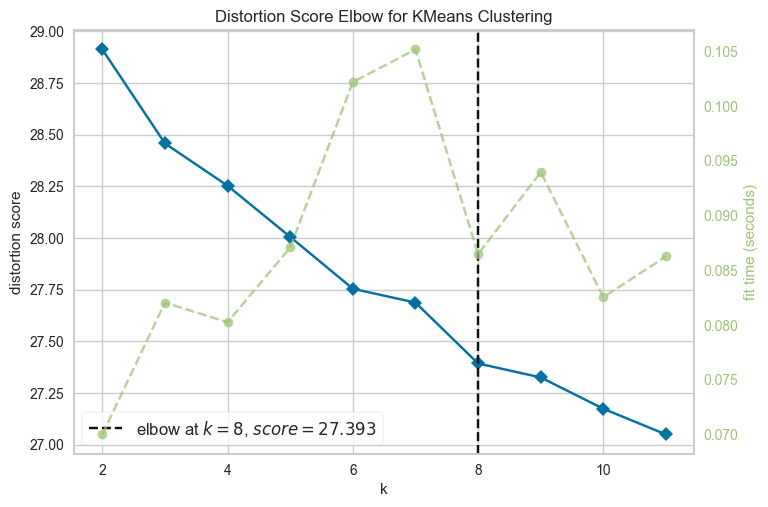

c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)




Labels: 
 [0 1 2 3 4 5 6 7] 

Distribution: 
 [83 13 59  4 42 66 16 17] 



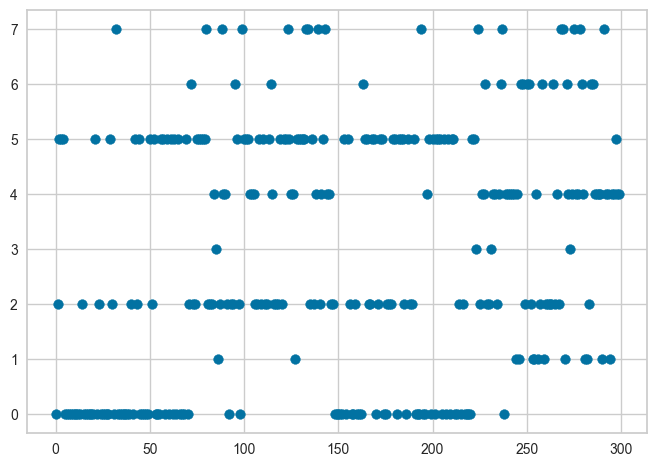

In [31]:
get_info(all_rrm, ground, e1_len, e2_len, e3_len, e4_len, rand)